In [9]:
#from Week_4 import G
import networkx as nx
G = nx.read_gpickle("css_graph.gpickle")

Part 1: Mixing Patterns and Assortativity.

In [10]:
import netwulf as nw
import matplotlib.pyplot as plt
import numpy as np
import random
import matplotlib.colors as mcolors
import math
import statistics
import random
from scipy.stats import ttest_1samp

In [11]:
#Make all missing top_fields = None
for author in G.nodes:
    if 'top_field' not in G.nodes[author]:
        G.nodes[author]['top_field'] = None


In [12]:
#Compute average neighboors in same top field as each node
def network_mean_same_field(top_fild_name):
    for author in G.nodes:
        G.nodes[author]['Avr_same_field'] = mean_same_field = statistics.mean(map(int, [G.nodes[author][top_fild_name] == field for field 
              in [G.nodes[neighboor][top_fild_name] for neighboor 
                  in G.neighbors(author)]]))
    
    #network average
    network_mean = statistics.mean(map(float, [G.nodes[author]['Avr_same_field'] for author in G.nodes]))
    return network_mean

network_mean = network_mean_same_field('top_field')

In [13]:
top_fields = list(nx.get_node_attributes(G, "top_field").values())

def randomise_top_fields_rand():
    random.shuffle(top_fields)
    for i, author in enumerate(G.nodes):
        G.nodes[author]['top_field_rand'] = top_fields[i]

In [14]:
#Compute average neighboors in same top field as each node 100 times for random top fields
rand_means = [] 
for i in range(100):
    randomise_top_fields_rand()
    rand_means.append(network_mean_same_field('top_field_rand'))
    
#rand_means


In [15]:
#compute the p-value for the null-hypothesis that out network mean occured by random... The p-value is extreemly low
t_stat, p_value = ttest_1samp(rand_means, network_mean)
p_value

2.0591516776548614e-92

In [21]:
#assortativity_coefficient wrt. field
nx.attribute_assortativity_coefficient(G, 'top_field')
#The positive value of r indicates that authors with the same top field are more likely to connect to each other 
#than to authors with the same top fields


0.19736071416782378

In [22]:
#assortativity_coefficient wrt. degree (default)
nx.degree_assortativity_coefficient(G)
#The positive value of r mean s taht the network is aasortative wrt degree i.e. authors with similar degrees are more likely to connect to each other 
#than to authors with differetn degrees


0.3570643745412559

In [31]:
close_centrals = nx.closeness_centrality(G)
top_ClosCentr = sorted(close_centrals.items(), key=lambda x: x[1], reverse=True)[:5]
top_ClosCentr
#We imagine that the scientists with a high closeness centrality have are very well connected, maybe they work in positions with many collaborative papers.

[('1682773', 0.016899441340782122),
 ('8311574', 0.015279568352194052),
 ('2836702', 0.015048059740797173),
 ('2856607', 0.014202949957139903),
 ('5164568', 0.014202949957139903)]

In [32]:
eigenvector = nx.eigenvector_centrality(G, max_iter = 2000)
top_eigenvector = sorted(eigenvector.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 scientists by eigenvector centrality:")
for node, centrality in top_eigenvector:
    print(node, centrality)

Top 5 scientists by eigenvector centrality:
1805055 0.36300538986992037
51901315 0.33772819910981333
35410873 0.3377281991098133
2101022236 0.3377281991098133
26401957 0.25497096664038343


In [ ]:
plt.plot()

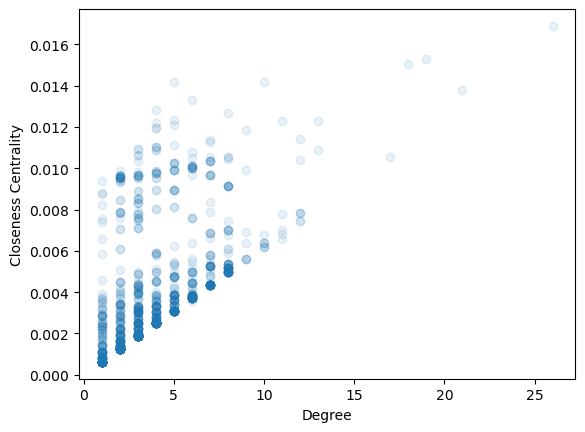

In [48]:
degree = dict(G.degree())
plt.scatter(list(degree.values()),list(close_centrals.values()), alpha=0.1)
plt.xlabel('Degree')
plt.ylabel('Closeness Centrality')
plt.show()

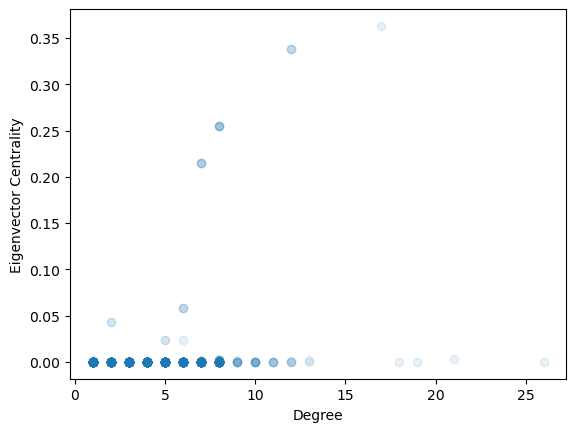

In [56]:
plt.scatter(list(degree.values()),list(eigenvector.values()), alpha=0.1)
plt.xlabel('Degree')
plt.ylabel('Eigenvector Centrality')
plt.show()
#there does not seem to be much of a correlation, i.e. your number of neighboors does not semm to dictate how central they are in the network.